<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Numerical_integration_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수치 적분 방법 비교
기본적인 서너 가지 수치 적분 방법(또는 "구적법")을 비교하는 데모 프로그램입니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import sympy as sym

적분 대상 함수:

$y = -0.1x^3+1.4x^2-4.7x+8.7+\sin(0.7x-1.3)$

In [ ]:
sym.init_printing()

In [ ]:
x = sym.symbols("x")
y = -0.1 * x**3 + 1.4 * x**2 - 4.7 * x + 8.7 + sym.sin(0.7 * x - 1.3)
y

       3        2                                 
- 0.1⋅x  + 1.4⋅x  - 4.7⋅x + sin(0.7⋅x - 1.3) + 8.7

In [ ]:
print(y)

-0.1*x**3 + 1.4*x**2 - 4.7*x + sin(0.7*x - 1.3) + 8.7


In [ ]:
y(3)

TypeError: 'Add' object is not callable

In [ ]:
# 기호 식(symbolic expression)으로부터
# 변수를 입력받아 값을 계산하는 함수를 생성한다
func = sym.lambdify([x], y)

# 이렇게 정의한 함수는 아래와 같은 함수처럼 동작한다:
# def func(x):
#   return -0.1 * x**3 + 1.4 * x**2 - 4.7 * x + 8.7 + np.sin(0.7 * x - 1.3)

In [ ]:
func(3)

np.float64(5.217356090899519)

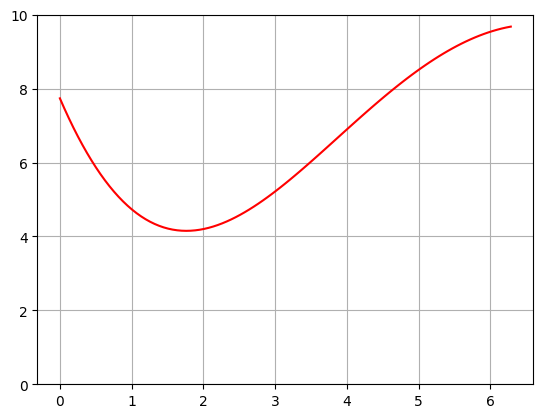

In [ ]:
# Numerical integration
# simple method approximates to piece-wise constant function
pi = np.pi
pltdivs = 101 # Plotting division
divs = 6 # 적분 구간 수

lower = 0
upper = 2*pi
X = np.linspace(lower,upper,pltdivs)
Y = func(X)

plt.ylim(0,10)
plt.grid()

plt.plot(X,Y,"r-")

# 직사각형 구적법(구분구적법)
첫번째는 가장 단순한 직사각형 구적법입니다.
구분구적법이라고도 하는 가장 단순한 방법으로,
함수의 정의역을 일정한 구간으로 나눈 다음
각 구간의 처음 값에 구간 간격을 곱하여 전 구간에 대하여 더합니다.
함수의 아래 면적을 그림과 같이 직사각형들의 면적 합으로 근사한 것과 같습니다.


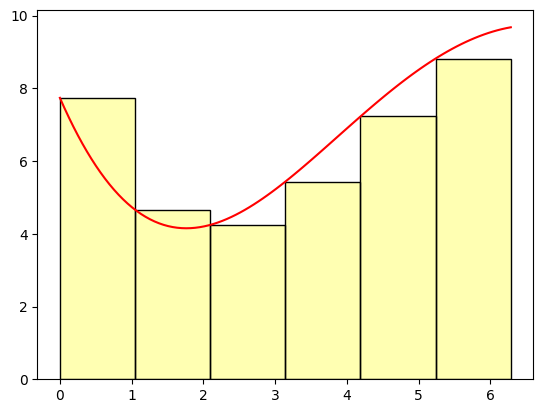

In [ ]:
# Numerical integration
# simple method approximates to piece-wise constant function

interval = (upper-lower)/divs
X = np.linspace(lower,upper,pltdivs)
Y = func(X)
xs1 = np.arange(lower,upper,interval)
ys1 = func(xs1)

plt.bar(xs1, ys1, width=interval, align='edge', color='#FFFF00',alpha=0.3)
plt.bar(xs1, ys1, width=interval, align='edge', fill=False)
plt.plot(X,Y,"r-")

In [ ]:
sym.pi

π

In [ ]:
xs1

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776])

In [ ]:
ys1

array([7.73644181, 4.66153362, 4.24403989, 5.43410941, 7.22551708,
       8.81861117])

In [ ]:
#정확한 적분 값
integral = sym.integrate(y, (x, 0, 2*sym.pi))
integral

       2        4                                                              ↪
- 9.4⋅π  - 0.4⋅π  + 0.382141183749411 - 1.42857142857143⋅cos(1.3 - 1.4⋅π) + 17 ↪

↪                          3
↪ .4⋅π + 3.73333333333333⋅π 

In [ ]:
# 정확한 적분 값의 수치 근삿값
integ = sym.N(integral)
integ

40.4919303813344

In [ ]:
"""
직사각형 구적법으로 계산한 결과
"""
rect = ys1.sum()*interval
rect

np.float64(39.91943557383252)

In [ ]:
"""
참값에 대한 직사각형 구적법의 상대오차:
"""
print(f"Relative Error: {(rect-integ)/integ*100:.2f} %")

Relative Error: -1.41 %


# 사다리꼴 구적법
두 번째는 사다리꼴 구적법(trapezoidal method)입니다.
일정한 구간으로 나누는 것은 직사각형 방법과 같지만
이번에는 구간 양쪽의 함수값의 평균에
구간 간격을 곱하여 더하는 것으로 그림과 같이
함수 아래 면적을 사다리꼴의 면적으로
근사하는 방법입니다.

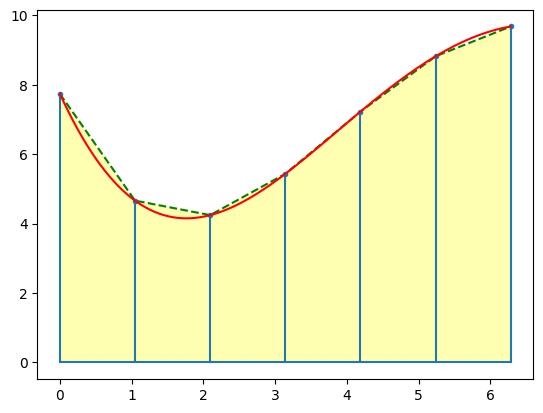

In [ ]:
# Trapezoidal method approximates to piece-wise linear function
fig, ax = plt.subplots()
xs = np.linspace(lower, upper,divs+1)
ys = func(xs)
polygonxs = np.append(xs, [xs[-1], xs[0]])
polygonys = np.append(ys, [0, 0])

ax.fill(polygonxs,polygonys,'#FFFF00', alpha=0.3)
ax.plot(xs,ys,"g--")
ax.stem(xs, ys, basefmt='-', markerfmt='.')
ax.plot(X,Y,"r-")

In [ ]:
# 사다리꼴 구적법에 따른 면적
h = xs[1] - xs[0]
trap = h/2 * (ys[0] + ys[-1] + 2*ys[1:-1].sum())
trap

np.float64(40.93558366204668)

In [ ]:
"""
scipy.integrate.trapezoid 를 이용하는 방법:
"""
integrate.trapezoid(ys, xs)

np.float64(40.93558366204669)

In [ ]:
"""
참값에 대한 사다리꼴 구적법의 상대오차
"""
print(f"Relative Error: {np.abs(trap-integ)/integ*100:.2f} %")

Relative Error: 1.10 %


# 중간값 구적법
직사각형 구적법과 비슷하지만
각 구간의 처음 값 대신 구간의 중간에서 구한 함수 값에
구간 간격을 곱하여 합하는 방법입니다.

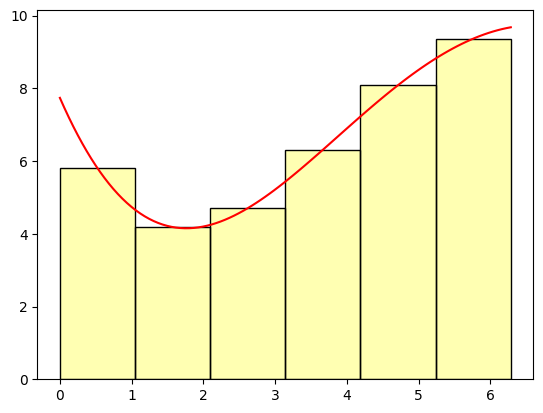

In [ ]:
# 중간값 방법

# Numerical integration
# simple method approximates to piece-wise constant function

X = np.linspace(lower,upper,pltdivs+1)
xms = np.arange(lower,upper,interval)
xm = xms + interval/2
Y = func(X)
ym = func(xm)
plt.bar(xms, ym, width=interval, align='edge', color='#FFFF00',alpha=0.3)
plt.bar(xms, ym, width=interval, align='edge', fill=False)
plt.plot(X,Y,"r-")

In [ ]:
"""
중간값 구적법으로 계산한 결과
"""
midp = ym.sum()*interval
midp

np.float64(40.2703802574095)

In [ ]:
"""
참값에 대한 중간값 구적법의 상대오차:
"""
print(f"Relative Error: {np.abs(midp-integ)/integ*100:.2f} %")

Relative Error: 0.55 %


# 심프슨 구적법
다음은 심슨(Simpson)의 구적법으로,
각 구간의 중간점을 하나씩 더 구한 다음
구간 양끝과 중간의 점을 지나는 포물선(2차함수)로
근사하여 면적을 구하는 방법입니다.
세 점에서의 함수값에 적당한 가중치를 줌으로써
이차함수로 근사한 면적을 구하는 방법으로, 구간 크기가 작아질 때 앞의 두 방법보다 오차가 더 빨리 줄어드는 방법입니다.

구체적으로는, 인접한 2개 구간씩 묶어 양끝과 중간의 세 점을 통과하는 2차 함수로 근사하여 구한 면적을 더해 나가는 방법으로, $n$이 $2$의 배수일 때, $x$ 좌표가 $x_0, x_1, x_2, x_3, x_4,\ \dots\ , x_n$이고($h=x_{k+1}-x_{k-1}$), $y$좌표가 $y_0, y_1, y_2, y_3, y_4,\ \dots\ , y_n$이라면($y_k=f(x_k)$), 적분값 $I$를,

$$I=\frac{h}{6}(y_0+4y_1+y_2) +\frac{h}{6}(y_2+4y_3+y_4)+\cdots+\frac{h}{6}(y_{n-2}+4y_{n-1}+y_n)$$

로 근사하는 방법입니다. 연결점의 값은 중복되므로 정리하면,
$$I=\frac{h}{6}(y_0+4y_1+2y_2+4y_3+2y_4+\cdots+2y_{n-2}+4y_{n-1}+y_n),$$
또는
$$ I = \dfrac{h}{6}\times\left(y_0+y_n+4\times\sum_{k=0}^{ \frac{n}{2}-1 } y_{2k+1}^{\ } + 2\times\sum_{k=1}^{ \frac{n}{2}-1 }y_{2k}^{\ } \right)$$

입니다.

In [ ]:
#세 개의 좌표 점을 지나는 포물선을 그리는 함수
def draw_three_point_parabola(x0, x2, y0, y1, y2, N=32):
    '''
    Draws a parabola that passes (x0, y0), (x1, y1), (x2, y2), where x1=(x0+x2)/2,
    using quadratic spline interpolation method,
    xc = x1 works as the abscissa of the central spline knot.
    '''
    xc = (x0+x2)/2        # abscissa of the central spline knot
    yc = 2*y1 - (y0+y2)/2 # ordinate of the central spline knot
    t = np.linspace(0, 1.0, N+1) # spline parameter (0 <= t <= 1)
    lx1 = np.linspace(x0, xc, N+1) # linear interpolation of x between x0 and xc
    lx2 = np.linspace(xc, x2, N+1) # linear interpolation of x between xc and x2
    ly1 = np.linspace(y0, yc, N+1) # linear interpolation of y between y0 and yc
    ly2 = np.linspace(yc, y2, N+1) # linear interpolation of y between yc and x2
    x = (1.0 - t)*lx1 + t*lx2  # secondary(quadratic) interpolation of x
    y = (1.0 - t)*ly1 + t*ly2  # secondary(quadratic) interpolation of y
    x = np.insert(x, 0, x[0], 0)
    y = np.insert(y, 0, 0, 0)
    x = np.append(x, x[-1])
    y = np.append(y, 0)
    plt.fill(x, y, "#FFFF00", alpha=0.3)
    plt.plot(x, y, "g--")

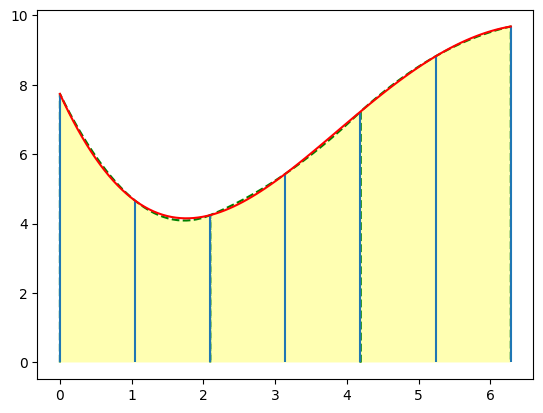

In [ ]:
# 주어진 함수를 구간 두 개씩 묶어 포물선으로 근사하여 그린다:
[draw_three_point_parabola(xs[i],xs[i+2],ys[i],ys[i+1],ys[i+2]) \
 for i in range(len(xs)-2) if (i%2)==0]

plt.stem(xs, ys, basefmt=' ', markerfmt=' ')

plt.plot(X,Y,color="red")

In [ ]:
xs

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 6.28318531])

In [ ]:
ys

array([7.73644181, 4.66153362, 4.24403989, 5.43410941, 7.22551708,
       8.81861117, 9.67714171])

In [ ]:
ys[1:-1:2]

array([4.66153362, 5.43410941, 8.81861117])

In [ ]:
ys[2:-2:2]

array([4.24403989, 7.22551708])

In [ ]:
"""
심프슨 구적법으로 구한 곡선 아래의 면적
"""
h = xs[2]-xs[0]
simp = h/6 * (ys[0] + ys[-1] + 4*ys[1:-1:2].sum() + 2*ys[2:-2:2].sum())
simp

np.float64(40.495029560725854)

In [ ]:
# 심프슨 방법을 함수로 구현한 예
def mysimpson(ylist, xlist):
  '''
  ylist: ordinates, array of length 2*k
  xlist: abscissas, array of length 2*k
  '''
  h = np.diff(xlist)[0]
  return h/3 * (ys[0] + ys[-1] + 4*ys[1:-1:2].sum() + 2*ys[2:-2:2].sum())

mysimpson(ys, xs)

np.float64(40.495029560725854)

In [ ]:
#scipy.integrate.simpson 함수를 이용하는 방법

integrate.simpson(ys,xs)

np.float64(40.495029560725854)

In [ ]:
"""
참값에 대한 심프슨 구적법의 상대오차
"""
print(f"Relative Error: {(simp-integ)/integ*100:.2f} %")

Relative Error: 0.01 %


* Scipy.integrate의 수치 적분 함수(quad)를 이용하는 방법


In [ ]:
'''
scipy.integrate.quad
수치적분

기본적으로 클렌쇼-커티스  구적법(Clenshaw-Curtis quadrature)을 사용하며
이는  각각의 구간을 체비쇼프 다항식(Chebyshev polynomials)으로 근사하여
면적을 계산하는 방법이다. 심프슨 구적법이 각 구간을 2차 함수로 근사하여,
필요한 세 개의 점에서 구한 함수값에 적절한 가중치를 곱하여 더함으로써
면적을 근사하듯, 클렌쇼-커티스 구적법도 선택된 몇 개의 점에서 구한
함수값에 적절한 가중치를 곱하여 더하는 방법을 사용한다.

참고:
https://en.wikipedia.org/wiki/Clenshaw–Curtis_quadrature

https://ko.wikipedia.org/wiki/체비쇼프_다항식

'''

integq = integrate.quad(func,lower,upper)[0];
integq

40.49193038133439

In [ ]:
# 앞서 정확한 적분으로부터 구한 근삿값:
integ

40.4919303813344

In [ ]:
"""
참값에 대한 수치 적분의 상대오차
"""
print(f"Relative Error: {(integq-integ)/integ*100:f} %")

Relative Error: 0.0000000000000350955229384490 %


In [ ]:
(integq - integ)/ integ

3.50955229384490e-16